# STEP 1: DATA LOADING & CLEANING

1.1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

 1.2: Load the Dataset

In [2]:
df = pd.read_csv('Leads.csv')

#Preview the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


1.3: Check Shape and Data Types

In [3]:
# Check shape and column types
print("Shape of the data:", df.shape)
print("\nData types:\n", df.dtypes)

Shape of the data: (9240, 37)

Data types:
 Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                      

1.4: Missing Values Summary

In [4]:
#check missing values 

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
missing_percentage = (missing/len(df))*100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percentage.round(2)})
missing_df

,Missing Count,Missing %
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


1.5: Drop Columns with Too Many Nulls (if applicable)

In [5]:
#Drop columns with more than 60% missing values 
to_drop = missing_df[missing_df['Missing %']>60].index
df.drop(columns = to_drop, inplace=True)

print("Dropped_Columns:", to_drop.tolist())


Dropped_Columns: []


1.6: Clean 'Select' Values (equivalent to NULLs)

In [6]:
#Replace 'Select' with NaN for relavent columns

df.replace('Select', np.nan, inplace=True)

1.7: Drop Duplicates

In [7]:
df.drop_duplicates(inplace = True)
print("Data shape after removing duplicates:", df.shape)

Data shape after removing duplicates: (9240, 37)


1.8: Check Value Counts for Categorical Columns

In [8]:
#categorical columns check 
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColumn:{col}")
    print(df[col].value_counts(dropna=False))


Column:Prospect ID
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64

Column:Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Column:Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN     

1.9: Check Target Variable Distribution

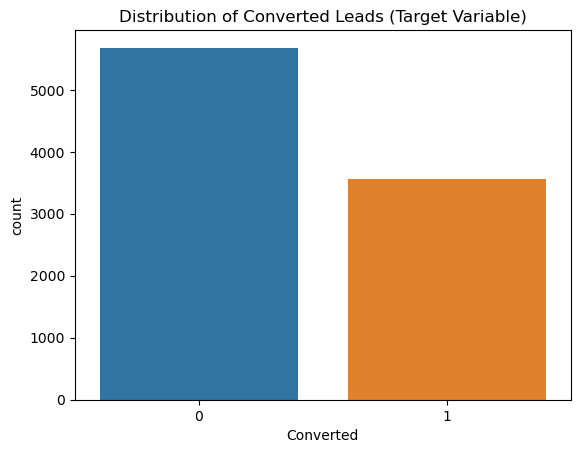

Converted
0    0.61
1    0.39
Name: proportion, dtype: float64


In [9]:
#Plotting target variable distribution 

sns.countplot(x='Converted', data=df)
plt.title("Distribution of Converted Leads (Target Variable)")
plt.show()

# Check balance
print(df['Converted'].value_counts(normalize=True).round(2))


# Step 2: Feature Engineering & Dummy Variable Creation

Step 2.1 – Drop Irrelevant Columns

In [10]:
# Drop identifier columns
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)


Step 2.2 – Drop Columns with Almost No Variation

In [11]:
low_variance_cols = [
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque',
    'A free copy of Mastering The Interview'
]

df.drop(low_variance_cols, axis=1, inplace=True)


Step 2.3 – Convert 'Yes'/'No' into Binary Numbers, 1 and 0

In [12]:
binary_map = {'Yes': 1, 'No': 0}
binary_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Through Recommendations']

for col in binary_cols:
    df[col] = df[col].map(binary_map)


Step 2.4 – Handle Missing Values

In [13]:
df = df.dropna(subset=['Specialization', 'Lead Source', 'Last Activity', 'Last Notable Activity'], how='any')


Step 2.5 – One-Hot Encode Categorical Variables

In [14]:
#Find all categorical columns and create dummy variables.

# Get list of object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Optional: remove high-cardinality or less useful columns
for col in ['Tags', 'City']:
    if col in categorical_cols:
        categorical_cols.remove(col)

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Step 2.6 – Final Check

In [15]:
# Shape and null check
print("Final shape of data:", df.shape)
print("Missing values:\n", df.isnull().sum())


Final shape of data: (5803, 140)
Missing values:
 Do Not Email                                           0
Do Not Call                                            0
Converted                                              0
TotalVisits                                           11
Total Time Spent on Website                            0
                                                      ..
Last Notable Activity_Page Visited on Website          0
Last Notable Activity_SMS Sent                         0
Last Notable Activity_Unreachable                      0
Last Notable Activity_Unsubscribed                     0
Last Notable Activity_View in browser link Clicked     0
Length: 140, dtype: int64


In [16]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,Tags,City,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in brows

In [17]:
# Still have missing values in TotalVisits (11 rows)

# Fill missing values with median
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())


In [18]:
#Check shape of the DataFrame
print("Final shape of data:", df.shape)


#Check for missing values
print("Missing values:\n", df.isnull().sum())

#Quick look at the data
df.head()

#Check data types
df.dtypes

Final shape of data: (5803, 140)
Missing values:
 Do Not Email                                          0
Do Not Call                                           0
Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
                                                     ..
Last Notable Activity_Page Visited on Website         0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 140, dtype: int64


Do Not Email                                            int64
Do Not Call                                             int64
Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
                                                       ...   
Last Notable Activity_Page Visited on Website            bool
Last Notable Activity_SMS Sent                           bool
Last Notable Activity_Unreachable                        bool
Last Notable Activity_Unsubscribed                       bool
Last Notable Activity_View in browser link Clicked       bool
Length: 140, dtype: object

# Step 3: Model Building

Step 3.1 - Import libraries   

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, 
                             confusion_matrix, roc_curve)

 Step 3.2: Split features and target variable

In [20]:
# Drop identifier columns if still present
X = df.drop(['Converted'], axis=1)
y = df['Converted']

Step 3.3: Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

Step 3.4: Feature Scaling

In [22]:
# Identify numeric columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scale only numeric columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Step 3.5: Build the Logistic Regression Model

In [23]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include='object').columns
print(non_numeric_cols)


Index(['Tags', 'City'], dtype='object')


In [24]:
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

In [25]:
# Drop rows with any NaN values
df_cleaned = df.dropna()

In [26]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')   

# Apply to the full dataset before train-test split
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [27]:
# Split features and target
X = df_imputed.drop('Converted', axis=1)
y = df_imputed['Converted']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

#Scale numeric features
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#Build and fit Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Step 4: Evaluate the Logistic Regression Model

In [28]:
print(y_train.value_counts())
print(y_test.value_counts())

Converted
0.0    2282
1.0    1780
Name: count, dtype: int64
Converted
0.0    978
1.0    763
Name: count, dtype: int64


Accuracy: 0.9282021826536473
Precision: 0.9164490861618799
Recall: 0.9200524246395806
F1 Score: 0.9182472204054938
ROC AUC Score: 0.9718378374032114

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       978
         1.0       0.92      0.92      0.92       763

    accuracy                           0.93      1741
   macro avg       0.93      0.93      0.93      1741
weighted avg       0.93      0.93      0.93      1741


Confusion_Matrix
 [[914  64]
 [ 61 702]]


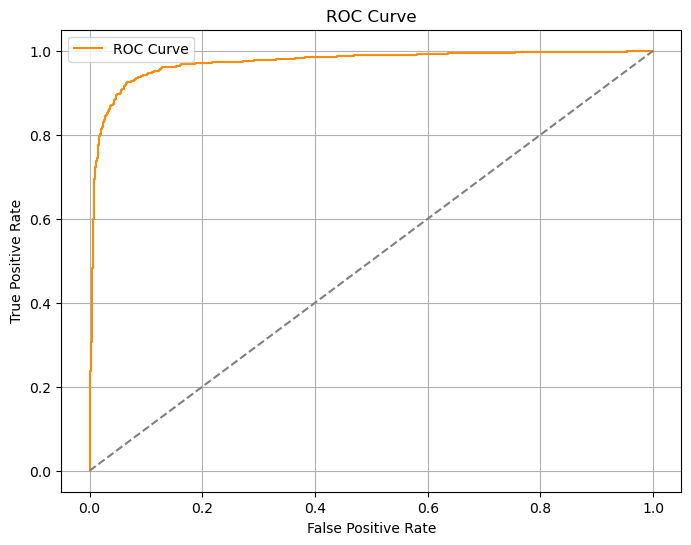

   Actual  Predicted  Probability  Lead Score
0     0.0        0.0     0.064174         6.0
1     1.0        0.0     0.019189         2.0
2     1.0        0.0     0.170245        17.0
3     0.0        0.0     0.000004         0.0
4     1.0        1.0     0.997518       100.0


In [29]:
# Rebuild and train model
logreg_balanced = LogisticRegression(max_iter=3000, class_weight='balanced')
logreg_balanced.fit(X_train, y_train)

# Predictions
y_pred = logreg_balanced.predict(X_test)
y_proba = logreg_balanced.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion_Matrix\n", cm)
 
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Lead Score Assignment
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability': y_proba
})
results['Lead Score'] = (results['Probability'] * 100).round()

print(results.head())

Step 5: Assign Lead Scores

In [30]:
# Create DataFrame with actual, predicted, and probability

results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability': y_proba
})

# Create Lead Score from predicted probability
results['Lead Score'] = (results['Probability'] * 100).round()

print(results.head())

   Actual  Predicted  Probability  Lead Score
0     0.0        0.0     0.064174         6.0
1     1.0        0.0     0.019189         2.0
2     1.0        0.0     0.170245        17.0
3     0.0        0.0     0.000004         0.0
4     1.0        1.0     0.997518       100.0


In [31]:
#Save the output to CSV:
results.to_csv("lead_scores_output.csv", index=False)

# Project Questions 

Question 1: Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [32]:
# Match feature names with their coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg_balanced.coef_[0]
})

# Sort by absolute value of coefficient to get top influencers
top_features = feature_coefficients.reindex(feature_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Display top 3 contributing features
top_features.head(3)

,Feature,Coefficient
154,Tags_Will revert after reading the email,1.893631
138,Tags_Closed by Horizzon,1.469171
149,Tags_Ringing,-1.326983


Question 2: What are the top 3 categorical/dummy variables in the model which should be focused 
the most on to increase the probability of lead conversion? 

In [33]:
# Get model coefficients with corresponding feature names
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg_balanced.coef_[0]
})

# Filter only dummy (categorical) variables — they are usually type bool or int with 0/1
dummy_vars = X_train.loc[:, X_train.nunique() == 2].columns

# Filter only dummy variable coefficients
dummy_coeff_df = coeff_df[coeff_df['Feature'].isin(dummy_vars)]

# Sort by descending coefficient to get most positively influential dummy variables
top_3_dummies = dummy_coeff_df.sort_values(by='Coefficient', ascending=False).head(3)

print(top_3_dummies)

                                      Feature  Coefficient
154  Tags_Will revert after reading the email     1.893631
138                   Tags_Closed by Horizzon     1.469171
145                         Tags_Lost to EINS     0.957665
